In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
def penRates(liOld, liNew, inWhat):
    holdList = []
    holdName = []
    for df in [liOld, liNew]:
        skillTotals = df[0].groupby('parent_skill_name').agg({'skill_member_ct' : 'sum'}).rename({'skill_member_ct' : 'penRate'}, axis=1)
        memTotal = df[0].groupby(['country_sk', inWhat + '_sk']).agg({'member_ct' : 'max'}).sum().rename({'member_ct' : 'penRate'})
        holdDf = skillTotals / memTotal
        name='penRate' + str(df[1])
        holdList.append(holdDf.rename({'penRate':name}, axis=1))
        holdName.append(name)
    hold = pd.merge(holdList[0], holdList[1], left_index=True, right_index=True)
    hold['ratio'] = hold[holdName[1]] / hold[holdName[0]]
    print('Penetration rates in {}, {} / {}:'.format(inWhat, liNew[1], liOld[1]))
    print(hold.describe())
    
    decreasing = hold[hold['ratio'] < 1]
    print('\nDecreasing penetration rates  in {}, {} / {}:'.format(inWhat, liNew[1], liOld[1]))
    print(decreasing.describe())
    print(decreasing.sort_values('ratio').head())

    increasing = hold[hold['ratio'] > 1]
    print('\nIncreasing penetration rates  in {}, {} / {}:'.format(inWhat, liNew[1], liOld[1]))
    print(increasing.describe())
    print(increasing.sort_values('ratio', ascending=False).head())

    name='penRate' + str(liOld[1])
    decreasing = hold[(hold['ratio'] < 1) & (hold[name] >= 0.01)]
    print('\nDecreasing penetration rates  in {}, {} / {} for parent skills with at least 1%:'.format(inWhat, liNew[1], liOld[1]))
    print(decreasing.describe())
    print(decreasing.sort_values(name).head(10))

    increasing = hold[(hold['ratio'] > 1) & (hold[name] >= 0.01)]
    print('\nIncreasing penetration rates  in {}, {} / {} for parent skills with at least 1%:'.format(inWhat, liNew[1], liOld[1]))
    print(increasing.describe())
    print(increasing.sort_values(name, ascending=False).head(10))
    #return (hold, decreasing)

In [3]:
ind2016 = pd.read_csv('../00_originalData/li_country_industry_parent_skill_supply_demand_2016.tsv', sep='\t')
ind2017 = pd.read_csv('../00_originalData/li_country_industry_parent_skill_supply_demand_2017.tsv', sep='\t')

In [4]:
penRates(liOld=(ind2016, 2016), liNew=(ind2017, 2017), inWhat='industry')

Penetration rates in industry, 2017 / 2016:
       penRate2016  penRate2017       ratio
count   119.000000   119.000000  119.000000
mean      0.042546     0.042421    0.992430
std       0.061076     0.061504    0.036893
min       0.000034     0.000035    0.946151
25%       0.004669     0.004473    0.972731
50%       0.017640     0.017624    0.986869
75%       0.056538     0.056912    1.004224
max       0.312773     0.308261    1.269035

Decreasing penetration rates  in industry, 2017 / 2016:
       penRate2016  penRate2017      ratio
count    82.000000    82.000000  82.000000
mean      0.035481     0.034793   0.976448
std       0.048798     0.048009   0.012712
min       0.000036     0.000035   0.946151
25%       0.004999     0.004796   0.965250
50%       0.016512     0.016142   0.978690
75%       0.046917     0.046573   0.987277
max       0.312773     0.308261   0.999082
                          penRate2016  penRate2017     ratio
parent_skill_name                                      

In [5]:
city2015 = pd.read_csv('../00_originalData/li_city_parent_skill_supply_demand_2015.tsv', sep='\t')
city2016 = pd.read_csv('../00_originalData/li_city_parent_skill_supply_demand_2016.tsv', sep='\t')

In [6]:
penRates(liOld=(city2015, 2015), liNew=(city2016, 2016), inWhat='region')

Penetration rates in region, 2016 / 2015:
       penRate2015  penRate2016       ratio
count   119.000000   119.000000  119.000000
mean      0.046427     0.045474    0.978711
std       0.065678     0.064750    0.023126
min       0.000025     0.000028    0.941314
25%       0.005719     0.005466    0.965468
50%       0.020015     0.020075    0.975222
75%       0.060618     0.059033    0.988156
max       0.328950     0.319129    1.102553

Decreasing penetration rates  in region, 2016 / 2015:
       penRate2015  penRate2016       ratio
count   105.000000   105.000000  105.000000
mean      0.046749     0.045601    0.972614
std       0.062629     0.061299    0.012670
min       0.000188     0.000180    0.941314
25%       0.007550     0.007280    0.964257
50%       0.022393     0.021842    0.971638
75%       0.061092     0.060161    0.981552
max       0.328950     0.319129    0.996362
                          penRate2015  penRate2016     ratio
parent_skill_name                                 

In [7]:
city2017 = pd.read_csv('../00_originalData/li_city_parent_skill_supply_demand_2017.tsv', sep='\t')

In [8]:
penRates(liOld=(city2016, 2016), liNew=(city2017, 2017), inWhat='region')

Penetration rates in region, 2017 / 2016:
       penRate2016  penRate2017       ratio
count   119.000000   119.000000  119.000000
mean      0.045474     0.044529    0.980694
std       0.064750     0.063436    0.015810
min       0.000028     0.000029    0.956846
25%       0.005466     0.005281    0.970164
50%       0.020075     0.020091    0.977587
75%       0.059033     0.057683    0.988025
max       0.319129     0.308729    1.043956

Decreasing penetration rates  in region, 2017 / 2016:
       penRate2016  penRate2017       ratio
count   110.000000   110.000000  110.000000
mean      0.048078     0.047045    0.977462
std       0.066449     0.065103    0.010197
min       0.000031     0.000031    0.956846
25%       0.006628     0.006591    0.969791
50%       0.021475     0.020915    0.976734
75%       0.060556     0.059963    0.984586
max       0.319129     0.308729    0.997604
                      penRate2016  penRate2017     ratio
parent_skill_name                                     

In [9]:
def skillsPC(df, inWhat):
    skillTotals = df['skill_member_ct'].sum()
    memTotal = df.groupby(['country_sk', inWhat + '_sk']).agg({'member_ct' : 'max'}).sum()
    print(skillTotals / memTotal)

In [10]:
skillsPC(ind2016, 'industry')

member_ct    5.06296
dtype: float64


In [11]:
skillsPC(ind2017, 'industry')

member_ct    5.048061
dtype: float64


In [12]:
skillsPC(city2015, 'region')

member_ct    5.524823
dtype: float64


In [13]:
skillsPC(city2016, 'region')

member_ct    5.411436
dtype: float64


In [14]:
skillsPC(city2017, 'region')

member_ct    5.298984
dtype: float64


In [21]:
def stratSkills(df=None, inWhat=None):
    
    skillTotals = df.groupby('parent_skill_name').agg({'skill_member_ct' : 'sum'}).rename({'skill_member_ct' : 'penRate'}, axis=1)
    memTotal = df.groupby(['country_sk', inWhat + '_sk']).agg({'member_ct' : 'max'}).sum().rename({'member_ct' : 'penRate'})
    penRate = skillTotals / memTotal
    return penRate

def showStrats(df=None, inWhat=None):
    temp = stratSkills(df, inWhat=inWhat)
    print(temp.describe())
    temp.plot.hist(xlim=(0, 1), bins=119)
    return temp
    

          penRate
count  119.000000
mean     0.055185
std      0.079220
min      0.000044
25%      0.006056
50%      0.022881
75%      0.073335
max      0.405692


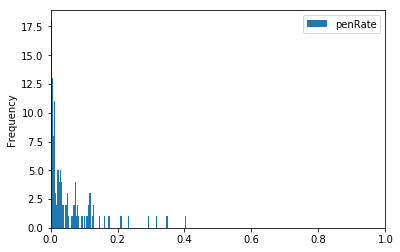

In [22]:
indStrat2016 = showStrats(ind2016, inWhat='industry_grp')

          penRate
count  119.000000
mean     0.055031
std      0.079788
min      0.000045
25%      0.005802
50%      0.022863
75%      0.073831
max      0.399901


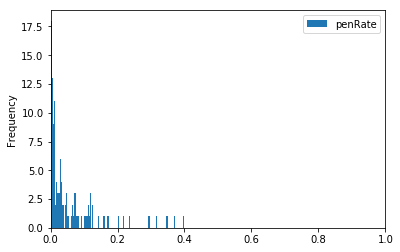

In [23]:
indStrat2017 = showStrats(ind2017, inWhat='industry_grp')

In [12]:
ind2016niche = indStrat2016[indStrat2016['penRate'] < indStrat2016['penRate'].quantile(q=0.25)]
ind2017niche = indStrat2017[indStrat2017['penRate'] < indStrat2017['penRate'].quantile(q=0.25)]
ind2016niche.index.difference(ind2017niche.index)
ind2017niche.index.difference(ind2016niche.index)

Index(['printing'], dtype='object', name='parent_skill_name')

Index(['facility_management_(fm)'], dtype='object', name='parent_skill_name')

In [13]:
ind2016mass = indStrat2016[indStrat2016['penRate'] > indStrat2016['penRate'].quantile(q=0.75)]
ind2017mass = indStrat2017[indStrat2017['penRate'] > indStrat2017['penRate'].quantile(q=0.75)]
ind2016mass.index.difference(ind2017mass.index)
ind2017mass.index.difference(ind2016mass.index)

Index(['electrical_engineering'], dtype='object', name='parent_skill_name')

Index(['web_design'], dtype='object', name='parent_skill_name')

In [14]:
ind2016mid = indStrat2016[(indStrat2016['penRate'] > indStrat2016['penRate'].quantile(q=0.25)) & (indStrat2016['penRate'] < indStrat2016['penRate'].quantile(q=0.75))]
ind2017mid = indStrat2017[(indStrat2017['penRate'] > indStrat2017['penRate'].quantile(q=0.25)) & (indStrat2017['penRate'] < indStrat2017['penRate'].quantile(q=0.75))]
ind2016mid.index.difference(ind2017mid.index)
ind2017mid.index.difference(ind2016mid.index)

Index(['facility_management_(fm)', 'web_design'], dtype='object', name='parent_skill_name')

Index(['electrical_engineering', 'printing'], dtype='object', name='parent_skill_name')

In [30]:
allFiles = {'ind2016niche':ind2016niche, 'ind2017niche':ind2017niche,
           'ind2016mass':ind2016mass, 'ind2017mass':ind2017mass,
           'ind2016mid':ind2016mid, 'ind2017mid':ind2017mid}

In [31]:
for filename, file in allFiles.items():
    file.to_csv('../02_data/' + filename + '.csv')